In [1]:
# Local
%cd ..
%cd src
import stm_trusssystem as TS
from stm_methods import *
# Global
import numpy as np
import math
import matplotlib.pyplot as plt

/Users/karinyu/Documents/GitHub/StrutandTieModelling
/Users/karinyu/Documents/GitHub/StrutandTieModelling/src


# Example for a dapped-end beam

In [2]:
# Generate Points
P1 = TS.Point(x = 0, y = 0, z = 0) 
P2 = TS.Point(x = 5000, y = 0, z = 0)
P3 = TS.Point(x = 5000, y = 1500, z = 0)
P4 = TS.Point(x = 7000, y = 1500, z = 0)
P5 = TS.Point(x = 7000, y = 3000, z = 0)
P6 = TS.Point(x = 0, y = 3000, z = 0) 
# Load Introduction
P7 = TS.Point(x = 6000, y = 1500, z = 0)
# Define Material
matC = TS.Material(30000,20,0.003,-1)
matT = TS.Material(205000,435,0.08,1)
DOF0 = TS.DOF(0,0,0,0,0,0)
# Polygon
Polygon = TS.Polygon()
Polygon.addPoint(P1)
Polygon.addPoint(P6)
Polygon.addPoint(P5)
Polygon.addPoint(P4)
Polygon.addPoint(P3)
Polygon.addPoint(P2)
# Add. Nodes
P7 = TS.Point(x = 250, y = 100,z = 0)
P8 = TS.Point(x = 3500, y = 100,z = 0)
P9 = TS.Point(x = 6000, y = 1600, z = 0)
N7 = TS.Node(P7,DOF0)
N8 = TS.Node(P8,DOF0)
N9 = TS.Node(P9,DOF0)
S1 = TS.Support(N7, TS.DOF(1,1,1,0,0,0))
S2 = TS.Support(N8, TS.DOF(0,1,0,0,0,0))

Make sure that the first material is concrete and the second for steel.
Is strut-and-tie model in equilibrium?  True


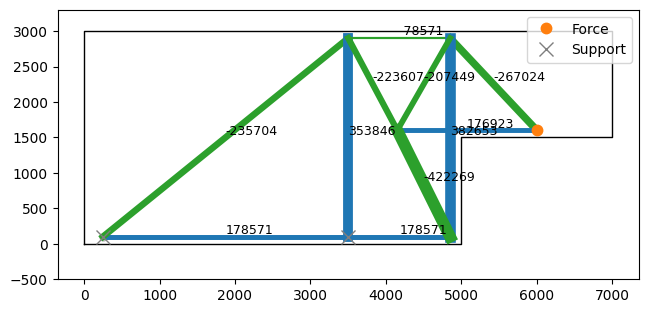

In [3]:
T2 = TS.TrussSystem()
#Search Space - CLOCKWISE
T2.addPolygontoSS(Polygon)
T2.addNode([N7, N8,  N9])
P10 = TS.Point(x=4850, y=2900, z=0)
P11 = TS.Point(x=3500, y=2900, z=0)
P12 = TS.Point(x=4850, y=100, z=0)
P13 = TS.Point(x=4150, y=1600, z=0)
N10 = TS.Node(P10, DOF0)
N11 = TS.Node(P11, DOF0)
N12 = TS.Node(P12, DOF0)
N13 = TS.Node(P13, DOF0)
T2.addNode([N10, N11, N12, N13])
T2.addMaterial(matC)
T2.addMaterial(matT)
# Edges
e1 = TS.Edge(N7, N8, matT)
e2 = TS.Edge(N7, N11, matC)
e3 = TS.Edge(N8, N11, matT)
e4 = TS.Edge(N8, N12, matT)
e5 = TS.Edge(N9, N10, matC)
e6 = TS.Edge(N9, N13, matT)
e7 = TS.Edge(N10, N11, matC)
e8 = TS.Edge(N10, N12, matT)
e9 = TS.Edge(N11, N13, matC)
e10 = TS.Edge(N12, N13, matC)
e11 = TS.Edge(N10, N13, matC)
T2.addEdge([e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11])
Force1 = TS.Force_ext(N9, [0, 200000, 0, 0, 0, 0], TS.DOF(0, 1, 0, 0, 0, 0))
T2.addForce(Force1)
# add Supports
T2.addSupport(S1)
T2.addSupport(S2)
T2.solveTruss(True)
T2.plotSTM(fig_size=(7.5,3.5),plot_scale=5e4, label_edges = True)
print('Is strut-and-tie model in equilibrium? ', T2.checkEquilibrium())

The maximum hydrostatic stress is assumed as :  20

current node: [250, 100, 0]
Hydrostatic nodal zones are assumed.

current node: [3500, 100, 0]
Hydrostatic nodal zones are assumed.

current node: [6000, 1600, 0]
Hydrostatic nodal zones are assumed.

current node: [4850, 2900, 0]
Hydrostatic nodal zones are assumed.

current node: [3500, 2900, 0]
Hydrostatic nodal zones are assumed.

current node: [4850, 100, 0]
Hydrostatic nodal zones are assumed.

current node: [4150, 1600, 0]
Hydrostatic nodal zones are assumed.


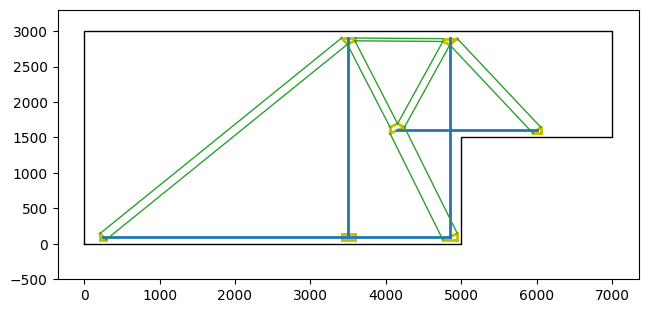

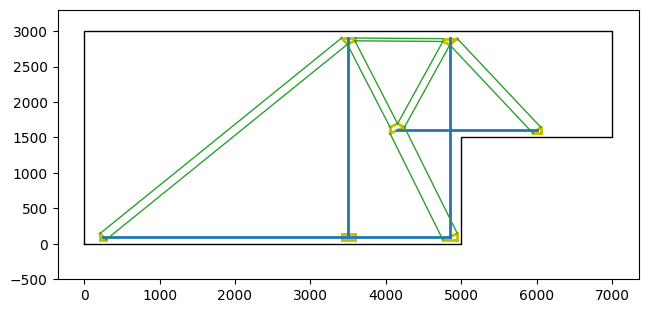

In [4]:
T2.plotStressField(fig_size=(7.5,3.5),t = 100, polygon_in=[Polygon], check_disc_points = True)